# Asking questions to images with **Gemini Pro Vision** 🖼️

This notebook is part of the article [Asking questions to images with Gemini Pro Vision](https://medium.com/@mikaeriohana/ml-story-asking-questions-to-images-with-gemini-pro-vision-f1ad0f88f602).

The use of Gemini through the Google AI Studio interface is now available!

Through AI Studio, it is also possible to access Gemini 1.5, which is expected to be released for use via API soon.
Access: https://aistudio.google.com/app/

In [42]:
!pip install -q google-generativeai


Gemini requires that you use an access key. This key can be obtained through AI Studio, as mentioned above.
You must authenticate using the SDK itself.

As a best practice and in order not to store the key information in the notebook, you can use Colab's own storage for quick tests.

In a recent update, Google Colab introduced the functionality to store access keys in the left menu, called "Secrets".
I added a key called `KEY_AI_STUDIO` there, and below, I use it.

Since the return considers Markdown formatting, we also import IPython libraries to have support for formatting.

This means that when you're working in a notebook environment like Google Colab, you can use IPython's display functions to render Markdown or other rich media types directly within your notebook cells.

In [110]:
import google.generativeai as genai

from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

KEY_AI_STUDIO = userdata.get('KEY_AI_STUDIO')
genai.configure(api_key=KEY_AI_STUDIO)

The call to **Gemini Pro Vision** is quite straightforward. It's also possible to list all the available models.

In [44]:
model = genai.GenerativeModel('gemini-pro-vision')

I have uploaded an image of one of the orchids I photographed in Singapore at the last event I attended with Google.

I will start asking some questions to understand the model's potential in a specific field, Visual Question Answering (VQA).
The possibilities are enormous. One of them is to use it to improve accessibility.

In [56]:
!curl -o purple-orchid.png https://drive.usercontent.google.com/download?id=1ndiU7qvSL1HEmZ05jVhtWOit7julQ_Zd

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  253k  100  253k    0     0   337k      0 --:--:-- --:--:-- --:--:--  337k


PIL *(Python Imaging Library)* is used to render the image and provide manipulation methods before adding it to the model.

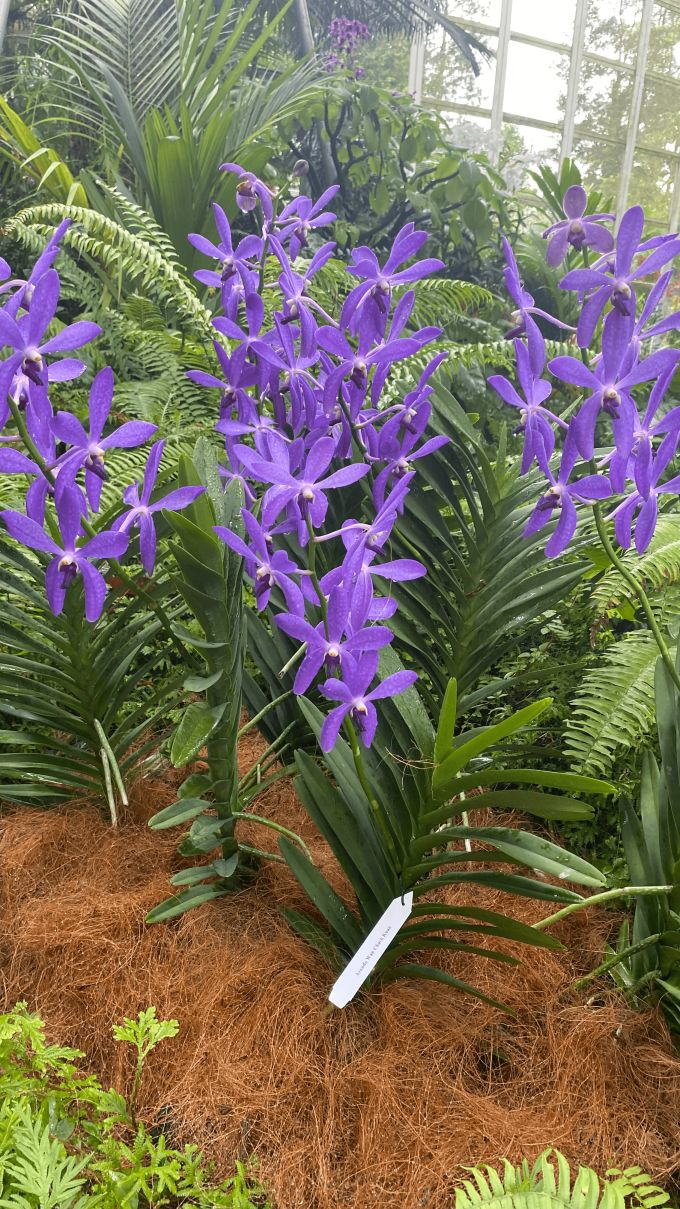

In [111]:
import PIL.Image

img_orchid = PIL.Image.open('purple-orchid.png')
img_orchid

With the image loaded, we use `gemini-pro-vision` and send it to the model via `generate_content`.

In [112]:
response = model.generate_content(img_orchid)

Markdown(response.text)

 These are some beautiful purple orchids.

If not only the description is important but also the answer to a specific question (as is the case in this example), one can add the sentence directly to the method.

Since I'm from Brazil, I will test the model's ability to answer a question in Brazilian Portuguese.






In [113]:
response = model.generate_content(["Quantas plantas existem na imagem?", img_orchid], stream=True)
response.resolve()

Markdown(response.text)

 Existem 5 plantas na imagem.

In [114]:
response = model.generate_content(["Liste quais cuidados devo ter para cuidar desta planta. Use: * Bullet Points, * Textos formatados * Separe por ponto e vírgula.""", img_orchid], stream=True)
response.resolve()

Markdown(response.text)

 * Iluminação: As orquídeas precisam de muita luz, mas não de luz solar direta. O ideal é colocá-las em um local onde recebam luz indireta, como perto de uma janela.
* Temperatura: As orquídeas preferem temperaturas entre 15°C e 25°C. Evite deixá-las em locais muito quentes ou muito frios.
* Umidade: As orquídeas precisam de umidade alta. Você pode aumentar a umidade do ar borrifando água nas folhas da planta ou colocando-a em um recipiente com água.
* Rega: As orquídeas precisam ser regadas regularmente, mas não devem ficar encharcadas. O ideal é regá-las uma vez por semana, ou quando o substrato estiver seco.
* Adubação: As orquídeas precisam ser adubadas regularmente. Você pode usar um fertilizante específico para orquídeas ou um fertilizante líquido.
* Pragas e doenças: As orquídeas podem ser atacadas por pragas, como cochonilhas e pulgões. Você pode usar um inseticida específico para orquídeas para controlar as pragas. As orquídeas também podem ser afetadas por doenças, como fungos e bactérias. Você pode usar um fungicida específico para orquídeas para controlar as doenças.

### Working with multiple images
Comparing orchids with tulips

<sub>(the following one is not mine :D)</sub>

In [117]:
!curl -o white-tulip.png https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcTW412t-l482Ar6QEeK0G4PmVcGitNAPLF8wGuXaFCEZu7pLihe

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34925  100 34925    0     0   488k      0 --:--:-- --:--:-- --:--:--  494k


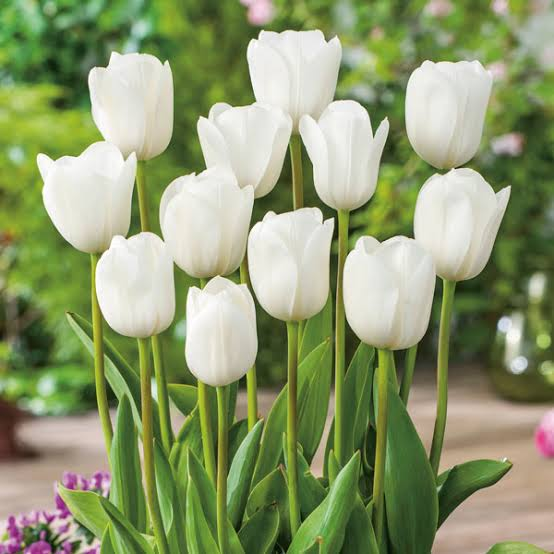

In [118]:
import PIL.Image

img_tulip = PIL.Image.open('white-tulip.png')
img_tulip

In [119]:
response = model.generate_content([ "Quantas tulipas roxas exitem na foto?", img_tulip], stream=True)
response.resolve()

Markdown(response.text)

 Não há tulipas roxas na foto. Todas as tulipas são brancas.

In [120]:
response = model.generate_content([ "Qual a diferença de tais plantas? E qual devo ter no Brasil?", img_orchid, img_tulip], stream=True)
response.resolve()

Markdown(response.text)

 As orquídeas são plantas epífitas, ou seja, vivem sobre outras plantas, enquanto as tulipas são plantas terrestres, ou seja, vivem no solo. As orquídeas são plantas tropicais, enquanto as tulipas são plantas temperadas. As orquídeas têm flores muito vistosas e delicadas, enquanto as tulipas têm flores mais simples, mas também muito bonitas. As orquídeas são plantas mais difíceis de cuidar, enquanto as tulipas são plantas mais fáceis de cuidar.

No Brasil, o clima é tropical, por isso, as orquídeas são mais adequadas para o cultivo. As orquídeas podem ser cultivadas em vasos ou em árvores, desde que recebam bastante luz solar e água. As tulipas podem ser cultivadas em vasos ou no solo, desde que o solo seja bem drenado e recebam bastante sol.

You can even analyze the feedback on the question you asked. Questions that violate any kind of category can be disregarded, and in the `prompt_feedback` method, you have access to the reasons for the block.

In [121]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}